In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
nba_df = pd.read_excel("/Users/daphne/Documents/ NBA Data Sets/team_data.xlsx")

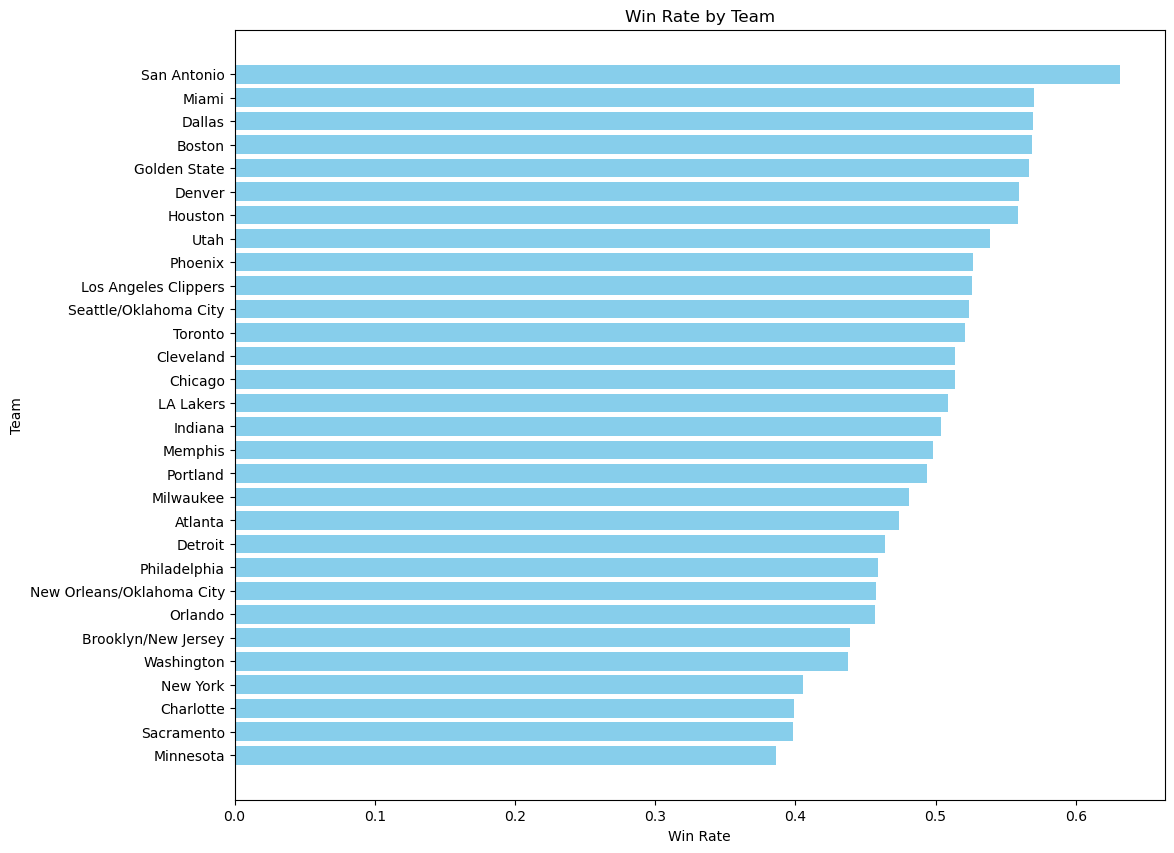

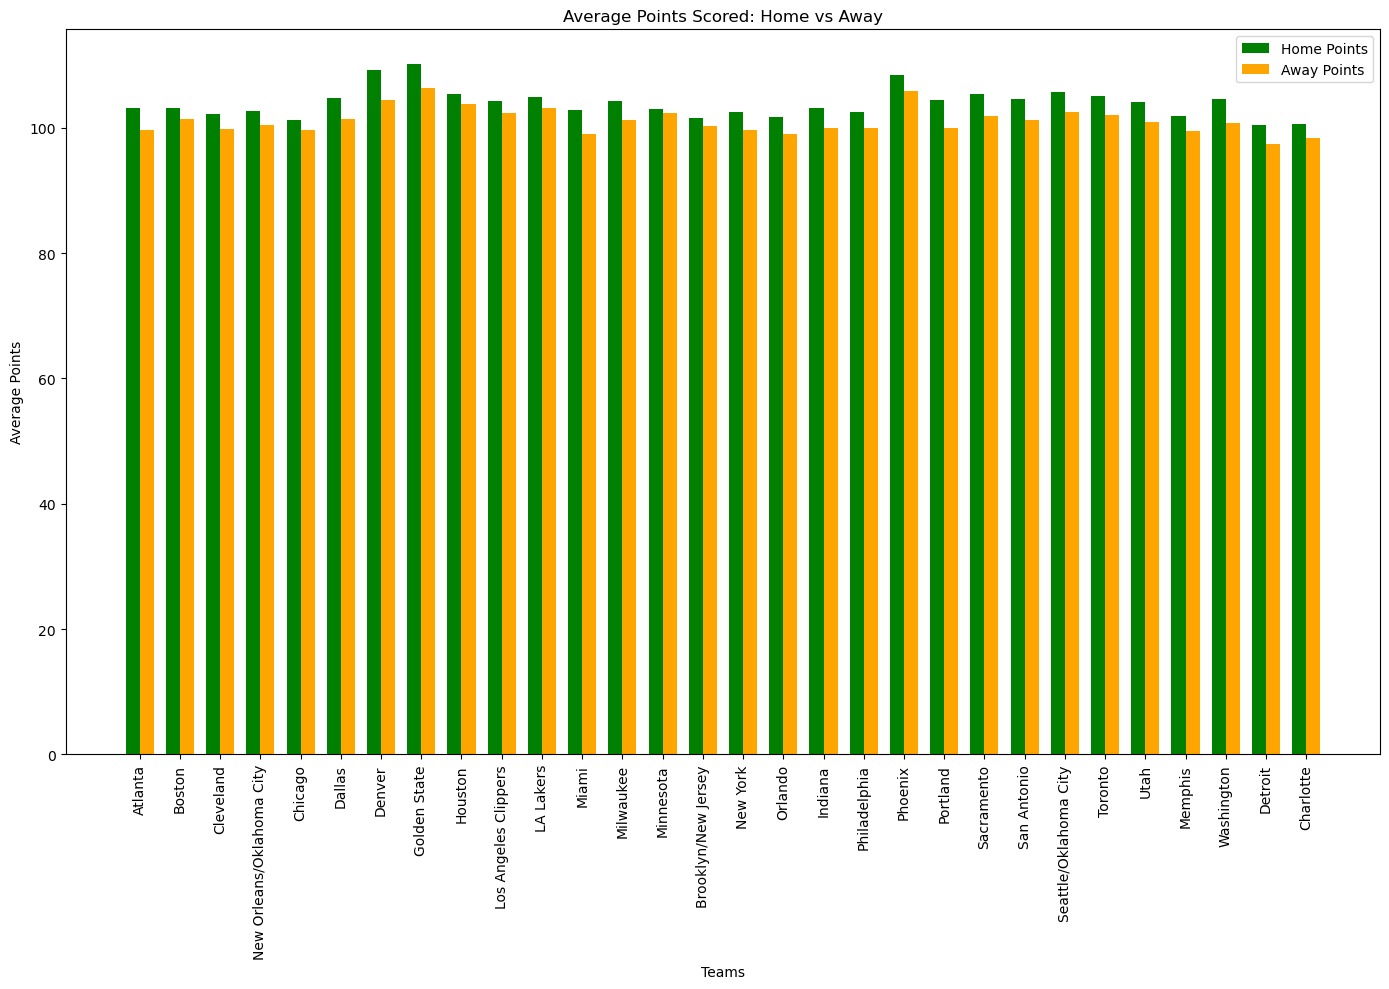

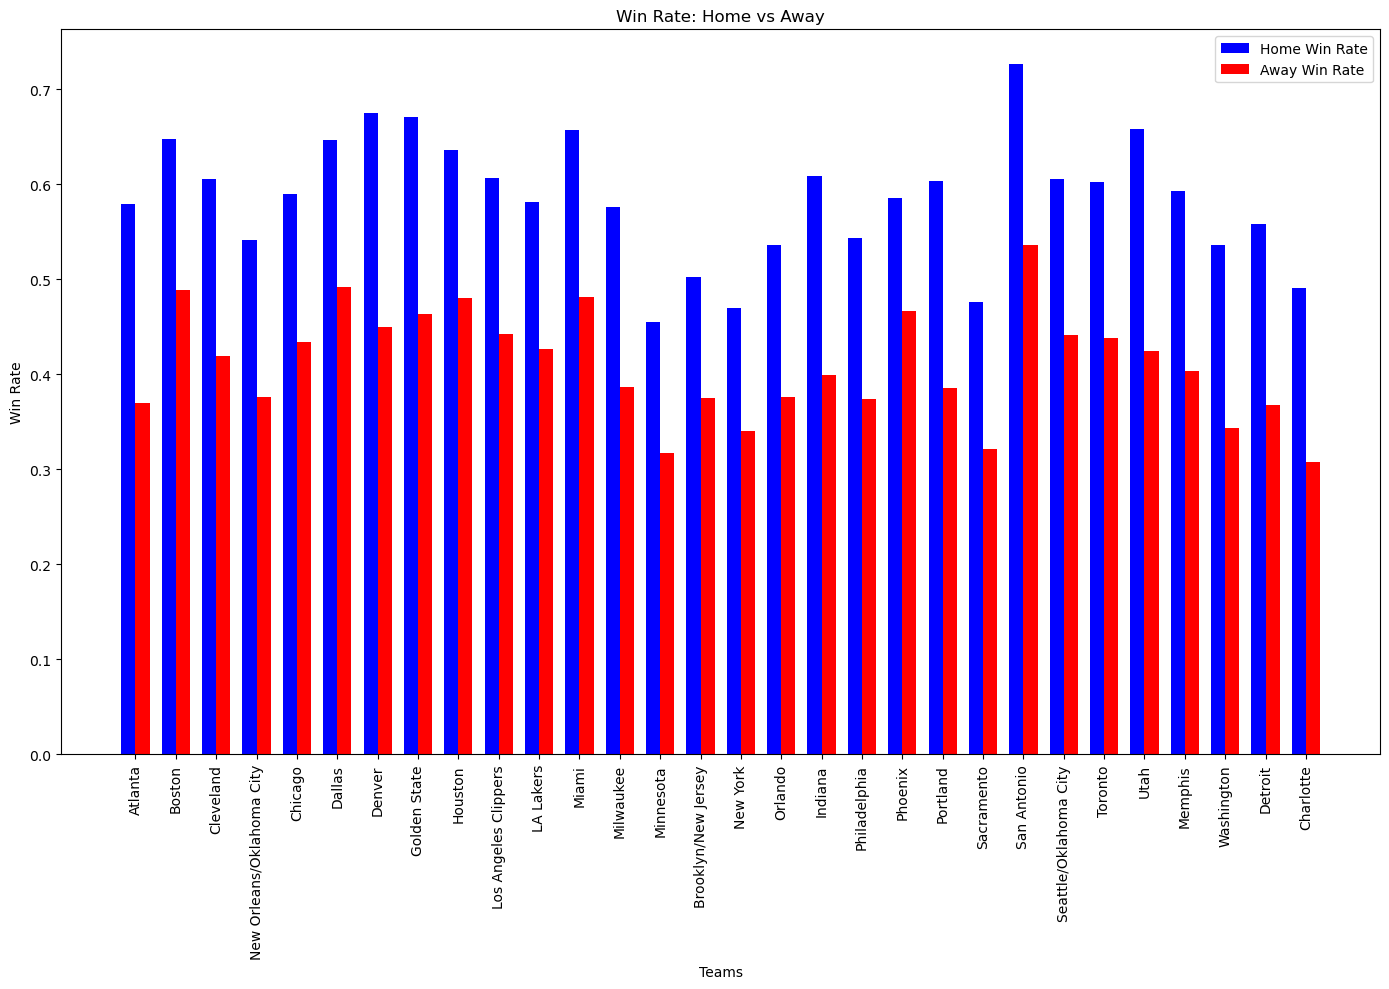

In [2]:


# Calculating Win Rate by Team
win_rate_by_team = nba_df.groupby('TEAM_ID')['TEAM_WINS'].mean().reset_index()
win_rate_by_team.columns = ['TEAM_ID', 'WIN_RATE']

# Mapping TEAM_ID to team names or cities (if available in the data)
team_cities = nba_df[['TEAM_ID', 'TEAM_CITY']].drop_duplicates()
win_rate_by_team = win_rate_by_team.merge(team_cities, on='TEAM_ID')

# Sorting teams by win rate
win_rate_by_team = win_rate_by_team.sort_values(by='WIN_RATE', ascending=False)

# Visualizing Win Rate by Team
plt.figure(figsize=(12, 10))
plt.barh(win_rate_by_team['TEAM_CITY'], win_rate_by_team['WIN_RATE'], color='skyblue')
plt.xlabel('Win Rate')
plt.ylabel('Team')
plt.title('Win Rate by Team')
plt.gca().invert_yaxis()  # To display the highest win rate at the top
plt.show()

# Calculating Home vs. Away Performance
home_away_performance = nba_df.groupby(['TEAM_ID', 'IS_HOME'])[['PTS', 'TEAM_WINS']].mean().reset_index()
home_away_performance = home_away_performance.merge(team_cities, on='TEAM_ID')

# Separating data for home and away games
home_performance = home_away_performance[home_away_performance['IS_HOME'] == 1]
away_performance = home_away_performance[home_away_performance['IS_HOME'] == 0]

# Renaming columns for clarity
home_performance.columns = ['TEAM_ID', 'IS_HOME', 'AVG_HOME_PTS', 'HOME_WIN_RATE', 'TEAM_CITY']
away_performance.columns = ['TEAM_ID', 'IS_HOME', 'AVG_AWAY_PTS', 'AWAY_WIN_RATE', 'TEAM_CITY']

# Merging home and away data
home_away_comparison = home_performance.merge(away_performance, on=['TEAM_ID', 'TEAM_CITY'])

# Visualizing Home vs. Away Performance with Grouped Bar Chart
labels = home_away_comparison['TEAM_CITY']
home_pts = home_away_comparison['AVG_HOME_PTS']
away_pts = home_away_comparison['AVG_AWAY_PTS']
home_win_rate = home_away_comparison['HOME_WIN_RATE']
away_win_rate = home_away_comparison['AWAY_WIN_RATE']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 10))
bar1 = ax.bar(x - width/2, home_pts, width, label='Home Points', color='green')
bar2 = ax.bar(x + width/2, away_pts, width, label='Away Points', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Teams')
ax.set_ylabel('Average Points')
ax.set_title('Average Points Scored: Home vs Away')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14, 10))
bar1 = ax.bar(x - width/2, home_win_rate, width, label='Home Win Rate', color='blue')
bar2 = ax.bar(x + width/2, away_win_rate, width, label='Away Win Rate', color='red')

ax.set_xlabel('Teams')
ax.set_ylabel('Win Rate')
ax.set_title('Win Rate: Home vs Away')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()


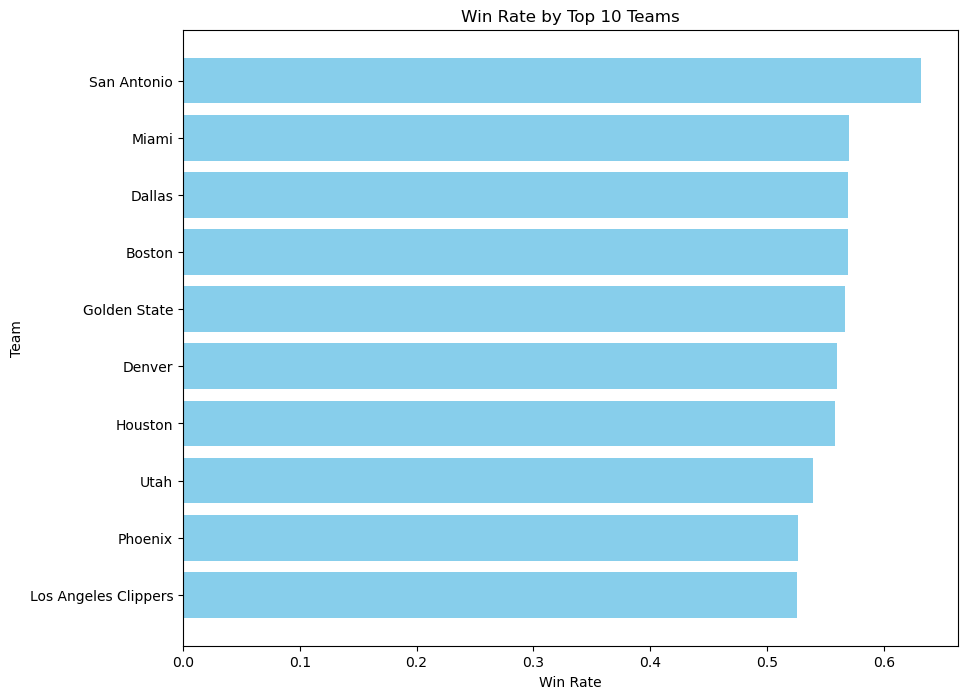

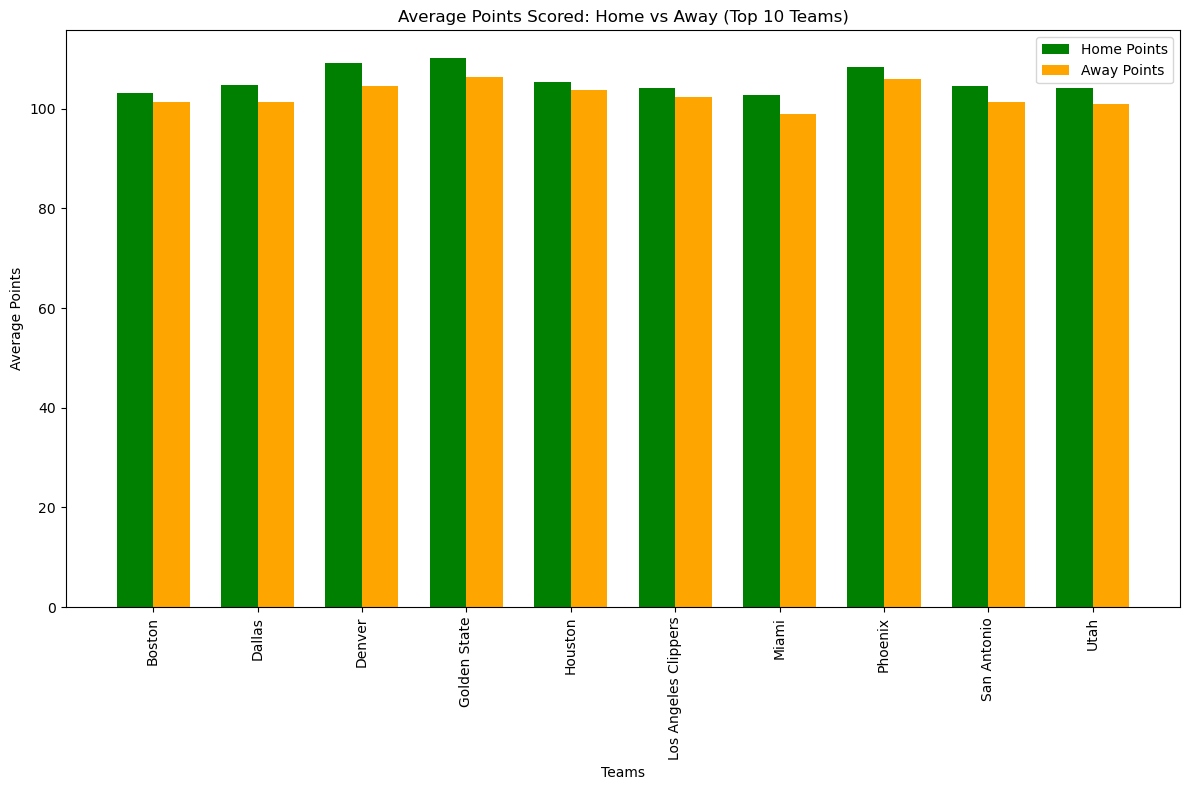

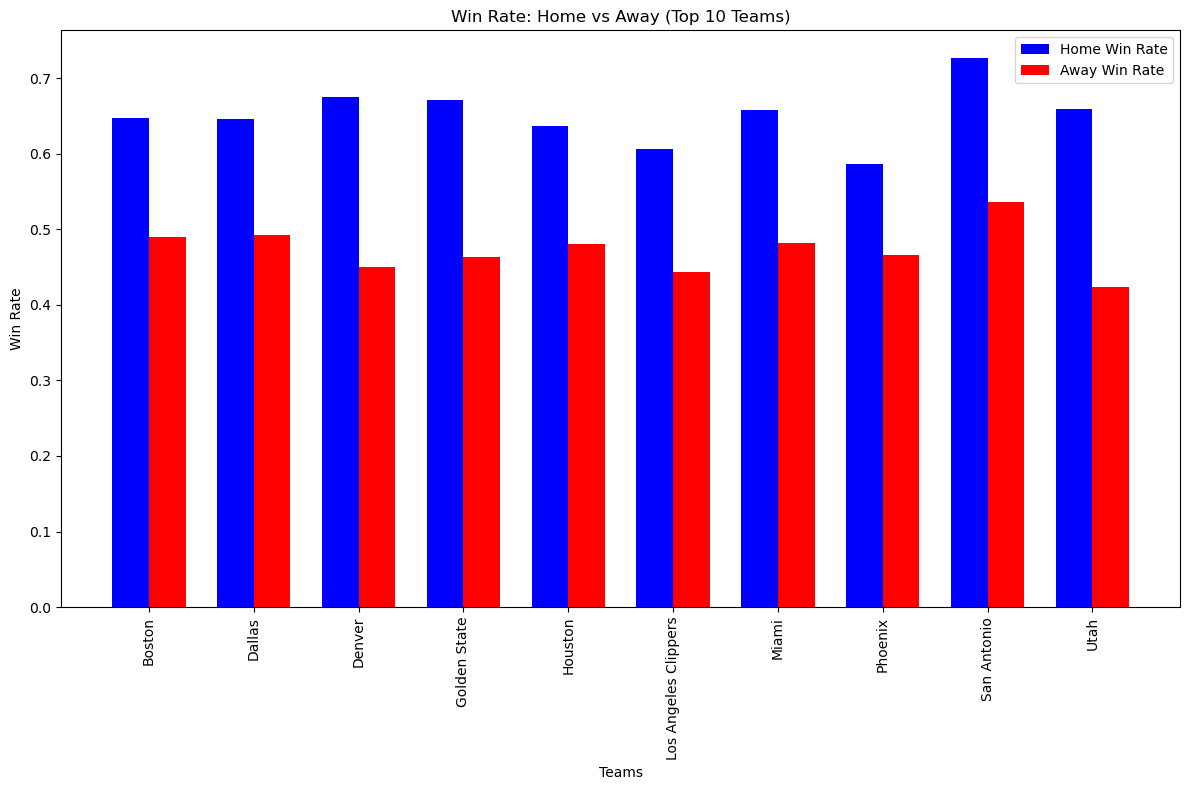

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Calculating Win Rate by Team
win_rate_by_team = nba_df.groupby('TEAM_ID')['TEAM_WINS'].mean().reset_index()
win_rate_by_team.columns = ['TEAM_ID', 'WIN_RATE']

# Mapping TEAM_ID to team names or cities (if available in the data)
team_cities = nba_df[['TEAM_ID', 'TEAM_CITY']].drop_duplicates()
win_rate_by_team = win_rate_by_team.merge(team_cities, on='TEAM_ID')

# Sorting teams by win rate and selecting the top 10 teams
top_teams = win_rate_by_team.sort_values(by='WIN_RATE', ascending=False).head(10)

# Visualizing Win Rate by Top 10 Teams
plt.figure(figsize=(10, 8))
plt.barh(top_teams['TEAM_CITY'], top_teams['WIN_RATE'], color='skyblue')
plt.xlabel('Win Rate')
plt.ylabel('Team')
plt.title('Win Rate by Top 10 Teams')
plt.gca().invert_yaxis()  # To display the highest win rate at the top
plt.show()

# Calculating Home vs. Away Performance
home_away_performance = nba_df.groupby(['TEAM_ID', 'IS_HOME'])[['PTS', 'TEAM_WINS']].mean().reset_index()
home_away_performance = home_away_performance.merge(team_cities, on='TEAM_ID')

# Separating data for home and away games
home_performance = home_away_performance[home_away_performance['IS_HOME'] == 1]
away_performance = home_away_performance[home_away_performance['IS_HOME'] == 0]

# Renaming columns for clarity
home_performance.columns = ['TEAM_ID', 'IS_HOME', 'AVG_HOME_PTS', 'HOME_WIN_RATE', 'TEAM_CITY']
away_performance.columns = ['TEAM_ID', 'IS_HOME', 'AVG_AWAY_PTS', 'AWAY_WIN_RATE', 'TEAM_CITY']

# Merging home and away data
home_away_comparison = home_performance.merge(away_performance, on=['TEAM_ID', 'TEAM_CITY'])

# Filtering the data to show only the top 10 teams
home_away_comparison_top = home_away_comparison[home_away_comparison['TEAM_ID'].isin(top_teams['TEAM_ID'])]

# Visualizing Home vs. Away Performance for Top 10 Teams with Grouped Bar Chart
labels = home_away_comparison_top['TEAM_CITY']
home_pts = home_away_comparison_top['AVG_HOME_PTS']
away_pts = home_away_comparison_top['AVG_AWAY_PTS']
home_win_rate = home_away_comparison_top['HOME_WIN_RATE']
away_win_rate = home_away_comparison_top['AWAY_WIN_RATE']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(x - width/2, home_pts, width, label='Home Points', color='green')
bar2 = ax.bar(x + width/2, away_pts, width, label='Away Points', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Teams')
ax.set_ylabel('Average Points')
ax.set_title('Average Points Scored: Home vs Away (Top 10 Teams)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(x - width/2, home_win_rate, width, label='Home Win Rate', color='blue')
bar2 = ax.bar(x + width/2, away_win_rate, width, label='Away Win Rate', color='red')

ax.set_xlabel('Teams')
ax.set_ylabel('Win Rate')
ax.set_title('Win Rate: Home vs Away (Top 10 Teams)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()


In [3]:
nba_df.groupby('SEASON')['TEAM_ID'].nunique()

SEASON
2004    30
2005    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
2012    30
2013    30
2014    30
2015    30
2016    30
2017    30
2018    30
2019    30
2020    30
2021    30
2022    30
Name: TEAM_ID, dtype: int64

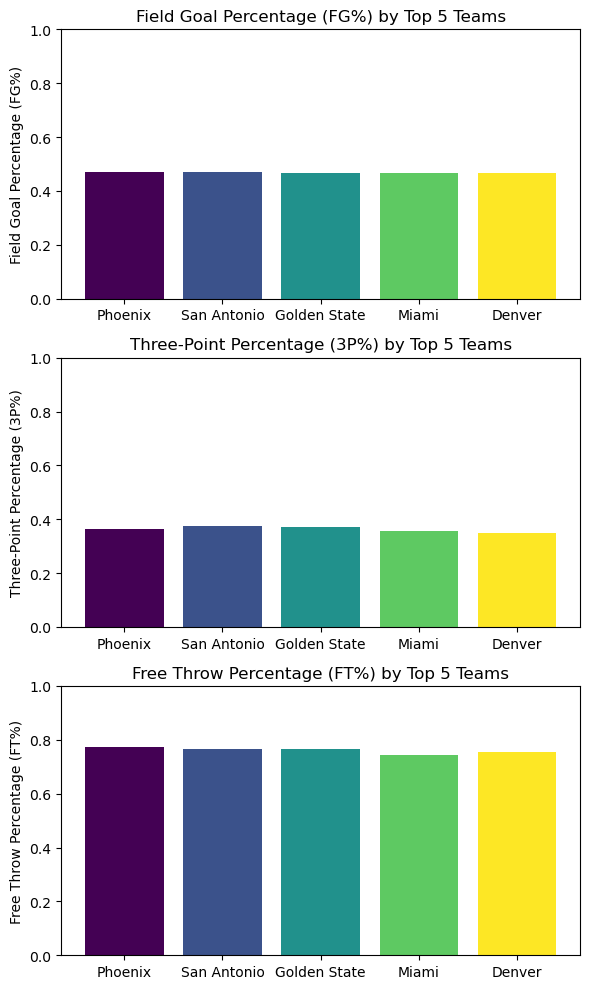

In [5]:
# Calculating shooting efficiency metrics by team
shooting_metrics = nba_df.groupby('TEAM_ID').agg({
    'FG_PCT': 'mean',
    'FG3_PCT': 'mean',
    'FT_PCT': 'mean'
}).reset_index()

# Mapping TEAM_ID to team names or cities (if available in the data)
team_cities = nba_df[['TEAM_ID', 'TEAM_CITY']].drop_duplicates()
shooting_metrics = shooting_metrics.merge(team_cities, on='TEAM_ID')

# Selecting the top 5 teams based on Field Goal Percentage (FG%)
top_teams = shooting_metrics.nlargest(5, 'FG_PCT')

# Visualizing the shooting efficiency with standing bar charts and a good color scale
fig, ax = plt.subplots(3, 1, figsize=(6, 10))

# Color scale
colors = plt.cm.viridis(np.linspace(0, 1, 5))

# Field Goal Percentage
ax[0].bar(top_teams['TEAM_CITY'], top_teams['FG_PCT'], color=colors)
ax[0].set_ylim(0, 1)  # Setting y-axis limits for percentage values
ax[0].set_ylabel('Field Goal Percentage (FG%)')
ax[0].set_title('Field Goal Percentage (FG%) by Top 5 Teams')

# Three-Point Percentage
ax[1].bar(top_teams['TEAM_CITY'], top_teams['FG3_PCT'], color=colors)
ax[1].set_ylim(0, 1)
ax[1].set_ylabel('Three-Point Percentage (3P%)')
ax[1].set_title('Three-Point Percentage (3P%) by Top 5 Teams')

# Free Throw Percentage
ax[2].bar(top_teams['TEAM_CITY'], top_teams['FT_PCT'], color=colors)
ax[2].set_ylim(0, 1)
ax[2].set_ylabel('Free Throw Percentage (FT%)')
ax[2].set_title('Free Throw Percentage (FT%) by Top 5 Teams')

plt.tight_layout()
plt.show()

In [6]:
# Load the data
team_data = pd.read_excel(r"C:\Users\Daphne\OneDrive\Documents\NBA data set\team_data.xlsx")


In [65]:
team_data.group

AttributeError: 'DataFrame' object has no attribute 'group'

Home Win Rate: 58.76%
Away Win Rate: 41.24%


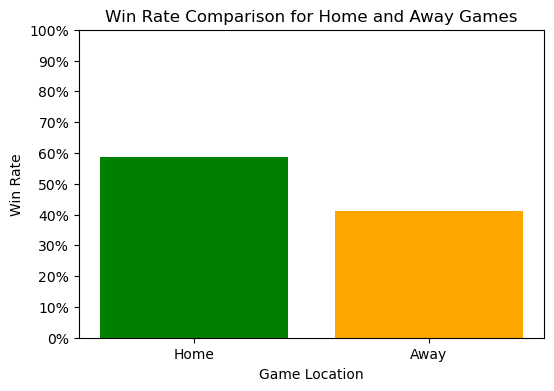

In [7]:
# Assuming `team_data` is the DataFrame loaded from your dataset
# Calculate win rates for home and away games
home_games = team_data[team_data['IS_HOME'] == 1]
away_games = team_data[team_data['IS_HOME'] == 0]

home_win_rate = home_games['TEAM_WINS'].mean()
away_win_rate = away_games['TEAM_WINS'].mean()

print(f"Home Win Rate: {home_win_rate * 100:.2f}%")
print(f"Away Win Rate: {away_win_rate * 100:.2f}%")

# Plotting the comparison
import matplotlib.pyplot as plt

win_rates = [home_win_rate, away_win_rate]
labels = ['Home', 'Away']

plt.figure(figsize=(6, 4))
plt.bar(labels, win_rates, color=['green', 'orange'])
plt.xlabel('Game Location')
plt.ylabel('Win Rate')
plt.title('Win Rate Comparison for Home and Away Games')
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(0, 11)], [f'{i*10}%' for i in range(0, 11)])
plt.show()


C:\Users\Daphne\AppData\Local\Temp\ipykernel_11108\1753021698.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(season_data))
C:\Users\Daphne\AppData\Local\Temp\ipykernel_11108\1753021698.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(season_data))
C:\Users\Daphne\AppData\Local\Temp\ipykernel_11108\1753021698.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10'

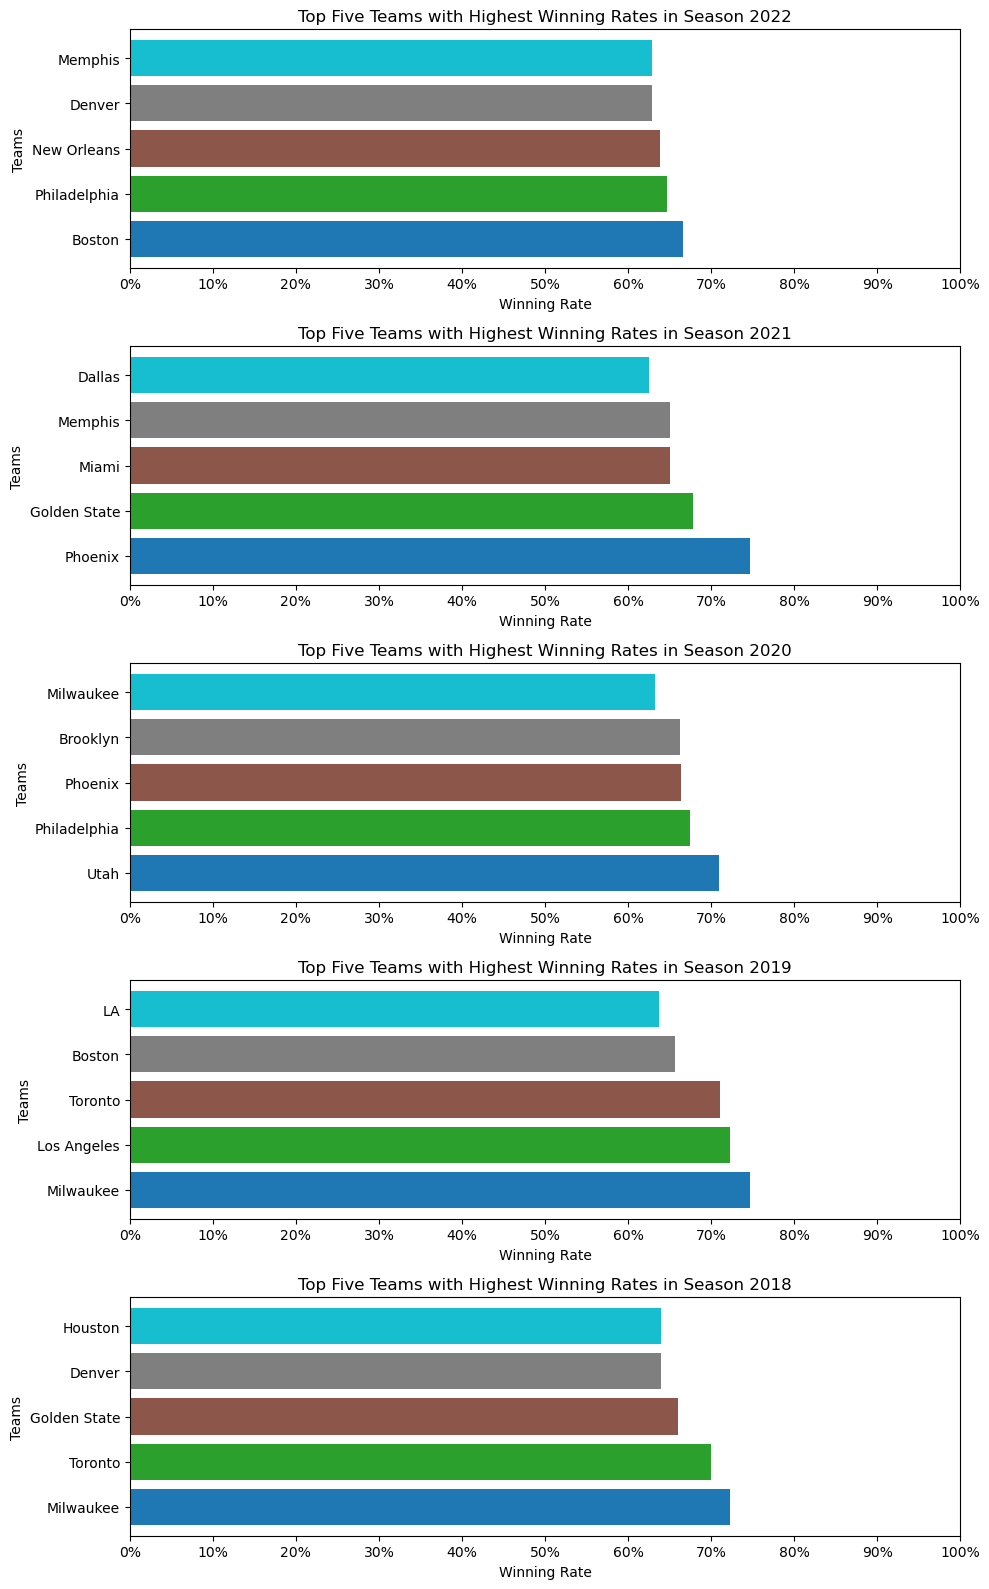

In [67]:
# Filter data for the specified seasons
seasons = [2022, 2021, 2020, 2019, 2018]
filtered_data = team_data[team_data['SEASON'].isin(seasons)]

# Calculate win rates for each team in each season
win_rates = filtered_data.groupby(['SEASON', 'TEAM_CITY'])['TEAM_WINS'].mean().reset_index()

# Get the top five teams with the highest win rates for each season
top_teams = win_rates.groupby('SEASON').apply(lambda x: x.nlargest(5, 'TEAM_WINS')).reset_index(drop=True)

# Plotting the top five teams for each season in separate bar graphs
fig, axes = plt.subplots(nrows=len(seasons), ncols=1, figsize=(10, 16))

for ax, season in zip(axes, seasons):
    season_data = top_teams[top_teams['SEASON'] == season]
    colors = plt.cm.get_cmap('tab10', len(season_data))
    ax.barh(season_data['TEAM_CITY'], season_data['TEAM_WINS'], color=colors(range(len(season_data))))
    ax.set_xlabel('Winning Rate')
    ax.set_ylabel('Teams')
    ax.set_xlim(0, 1)
    ax.set_xticks([i/10 for i in range(0, 11)])
    ax.set_xticklabels([f'{i*10}%' for i in range(0, 11)])
    ax.set_title(f'Top Five Teams with Highest Winning Rates in Season {season}')

plt.tight_layout()
plt.show()


C:\Users\Daphne\AppData\Local\Temp\ipykernel_12472\1242715283.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Dark2', len(season_data))
C:\Users\Daphne\AppData\Local\Temp\ipykernel_12472\1242715283.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Dark2', len(season_data))
C:\Users\Daphne\AppData\Local\Temp\ipykernel_12472\1242715283.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Dark2'

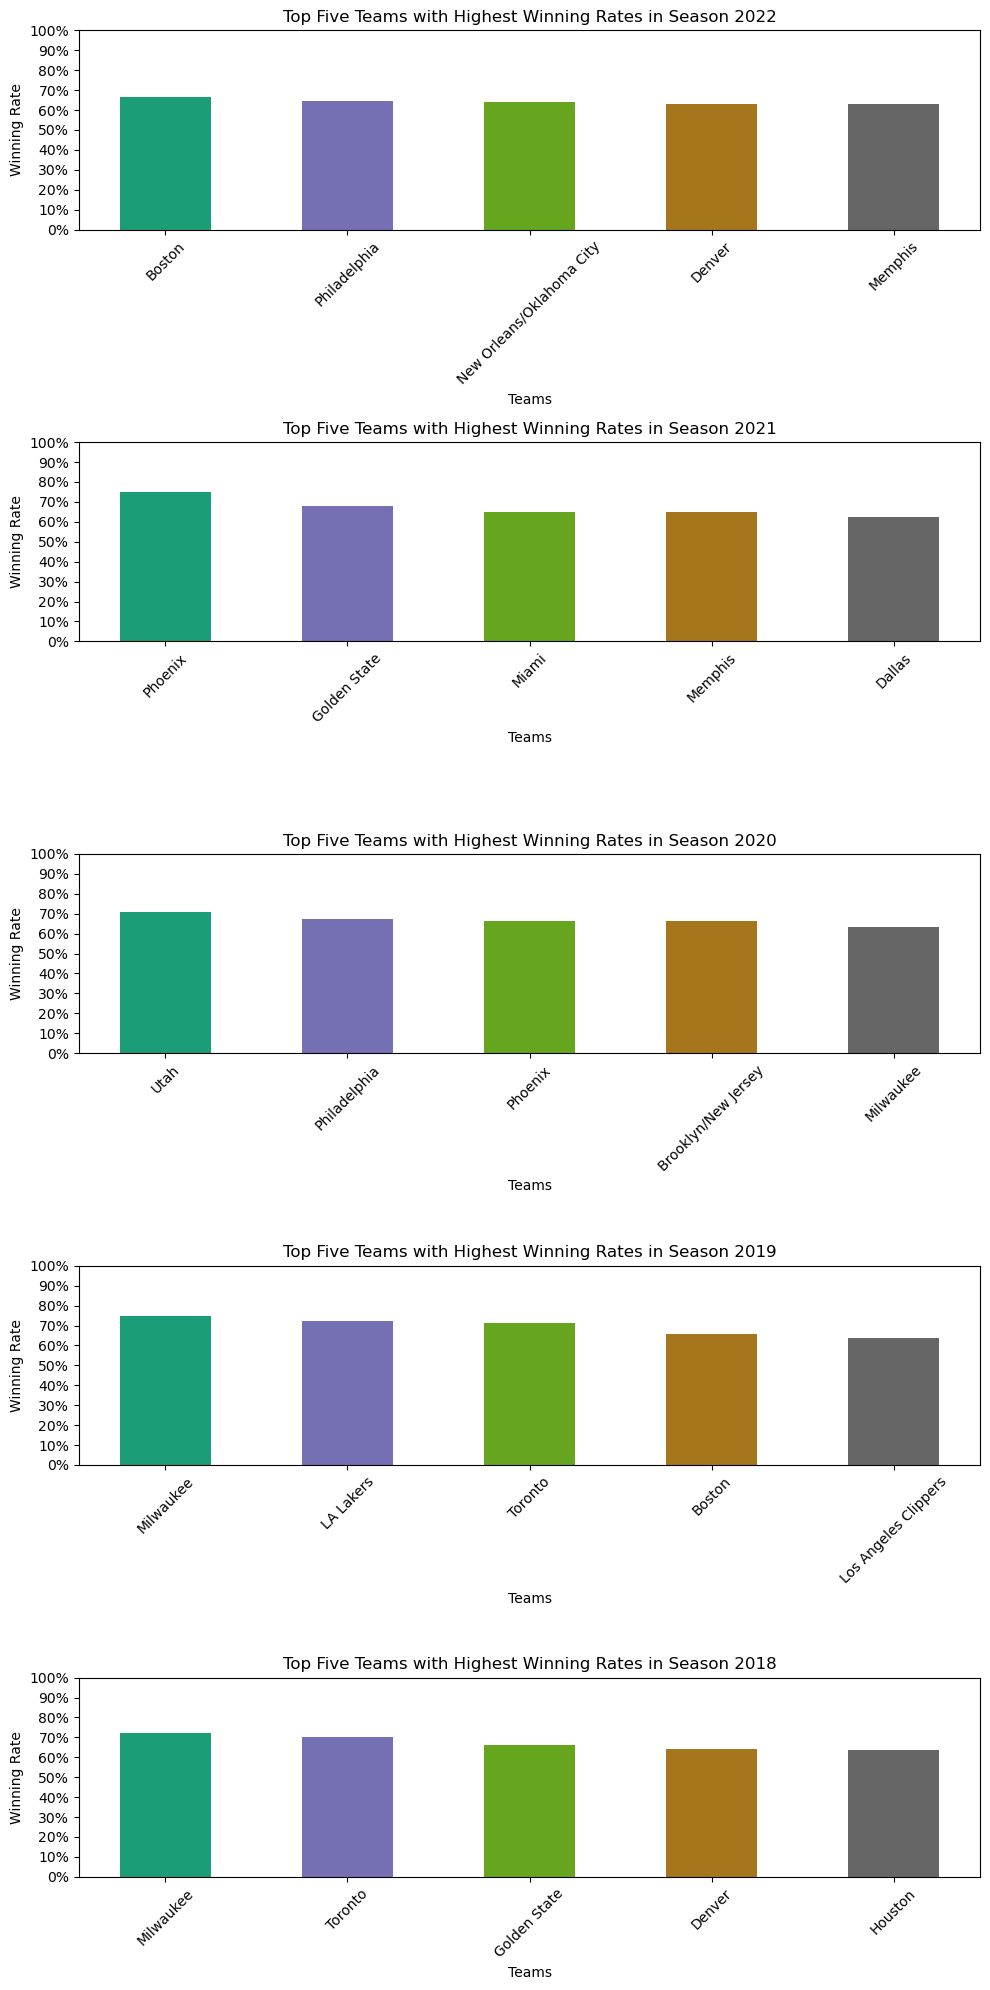

In [8]:

# Filter data for the specified seasons
seasons = [2022, 2021, 2020, 2019, 2018]
filtered_data = team_data[team_data['SEASON'].isin(seasons)]

# Calculate win rates for each team in each season
win_rates = filtered_data.groupby(['SEASON', 'TEAM_CITY'])['TEAM_WINS'].mean().reset_index()

# Get the top five teams with the highest win rates for each season
top_teams = win_rates.groupby('SEASON').apply(lambda x: x.nlargest(5, 'TEAM_WINS')).reset_index(drop=True)

# Plotting the top five teams for each season in separate bar graphs
fig, axes = plt.subplots(nrows=len(seasons), ncols=1, figsize=(10, 20))

for ax, season in zip(axes, seasons):
    season_data = top_teams[top_teams['SEASON'] == season]
    colors = plt.cm.get_cmap('Dark2', len(season_data))
    ax.bar(season_data['TEAM_CITY'], season_data['TEAM_WINS'], color=colors(range(len(season_data))), width=0.5)
    ax.set_ylabel('Winning Rate')
    ax.set_xlabel('Teams')
    ax.set_ylim(0, 1)
    ax.set_yticks([i/10 for i in range(0, 11)])
    ax.set_yticklabels([f'{i*10}%' for i in range(0, 11)])
    ax.set_title(f'Top Five Teams with Highest Winning Rates in Season {season}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Team with the most wins in away matches: Los Angeles with 546 wins


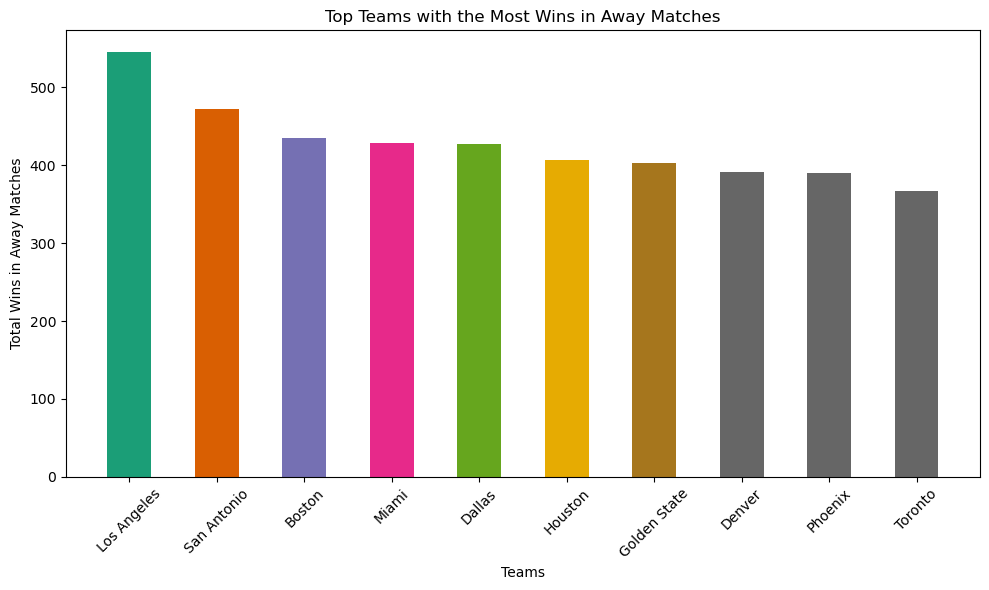

,TEAM_CITY,TEAM_WINS
13,Los Angeles,546
28,San Antonio,472
1,Boston,435
15,Miami,428
6,Dallas,427
10,Houston,407
9,Golden State,403
7,Denver,391
25,Phoenix,390
30,Toronto,367


In [69]:

# Filter data for away games
away_games = team_data[team_data['IS_HOME'] == 0]

# Calculate the total wins for each team in away matches
away_wins = away_games.groupby('TEAM_CITY')['TEAM_WINS'].sum().reset_index()

# Identify the team with the most wins in away matches
top_away_team = away_wins.loc[away_wins['TEAM_WINS'].idxmax()]

# Print the team with the most away wins
top_team_name = top_away_team['TEAM_CITY']
top_team_wins = top_away_team['TEAM_WINS']

print(f"Team with the most wins in away matches: {top_team_name} with {top_team_wins} wins")

# Sort teams by total away wins in descending order for visualization
away_wins = away_wins.sort_values(by='TEAM_WINS', ascending=False).head(10)

# Plotting the top teams with the most away wins
plt.figure(figsize=(10, 6))
colors = plt.cm.Dark2(range(len(away_wins)))
plt.bar(away_wins['TEAM_CITY'], away_wins['TEAM_WINS'], color=colors, width=0.5)
plt.xlabel('Teams')
plt.ylabel('Total Wins in Away Matches')
plt.title('Top Teams with the Most Wins in Away Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the sorted dataframe for the top teams
away_wins


Top 5 Teams with the Most 3-Pointers Made:
       TEAM_CITY   FG3M
10       Houston  17973
9   Golden State  17808
6         Dallas  15712
22       Phoenix  15391
1         Boston  15389


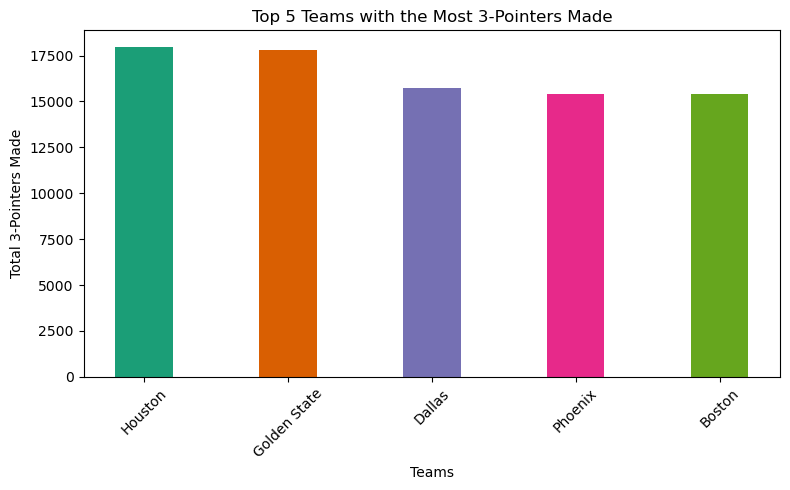

,TEAM_CITY,FG3M
10,Houston,17973
9,Golden State,17808
6,Dallas,15712
22,Phoenix,15391
1,Boston,15389


In [9]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the total 3-pointers made for each team
three_pointers = team_data.groupby('TEAM_CITY')['FG3M'].sum().reset_index()

# Identify the top 5 teams with the most 3-pointers made
top_three_pointer_teams = three_pointers.sort_values(by='FG3M', ascending=False).head(5)

# Print the top 5 teams with the most 3-pointers made
print("Top 5 Teams with the Most 3-Pointers Made:")
print(top_three_pointer_teams)

# Plotting the top 5 teams with the most 3-pointers made
plt.figure(figsize=(8, 5))
colors = plt.cm.Dark2(range(len(top_three_pointer_teams)))
plt.bar(top_three_pointer_teams['TEAM_CITY'], top_three_pointer_teams['FG3M'], color=colors, width=0.4)
plt.xlabel('Teams')
plt.ylabel('Total 3-Pointers Made')
plt.title('Top 5 Teams with the Most 3-Pointers Made')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the sorted dataframe for the top teams
top_three_pointer_teams


Top 5 Teams with the Most Assists:
       TEAM_CITY    AST
13   Los Angeles  61418
9   Golden State  43265
1         Boston  41107
28   San Antonio  41004
7         Denver  40652


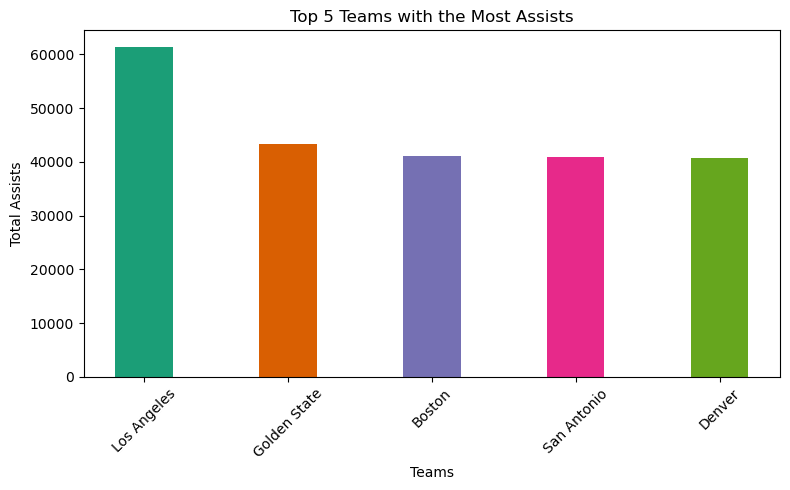

,TEAM_CITY,AST
13,Los Angeles,61418
9,Golden State,43265
1,Boston,41107
28,San Antonio,41004
7,Denver,40652


In [71]:

# Calculate the total assists for each team
assists = team_data.groupby('TEAM_CITY')['AST'].sum().reset_index()

# Identify the top 5 teams with the most assists
top_assist_teams = assists.sort_values(by='AST', ascending=False).head(5)

# Print the top 5 teams with the most assists
print("Top 5 Teams with the Most Assists:")
print(top_assist_teams)

# Plotting the top 5 teams with the most assists
plt.figure(figsize=(8, 5))
colors = plt.cm.Dark2(range(len(top_assist_teams)))
plt.bar(top_assist_teams['TEAM_CITY'], top_assist_teams['AST'], color=colors, width=0.4)
plt.xlabel('Teams')
plt.ylabel('Total Assists')
plt.title('Top 5 Teams with the Most Assists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the sorted dataframe for the top teams numerically
top_assist_teams


Top 5 Teams with the Most Rebounds:
                TEAM_CITY    REB
25            San Antonio  75871
12              LA Lakers  75571
1                  Boston  75511
9            Golden State  75074
26  Seattle/Oklahoma City  74985


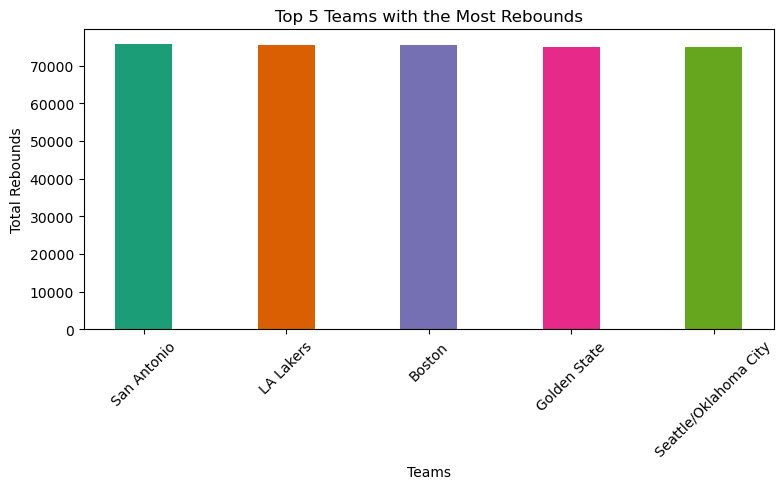

,TEAM_CITY,REB
25,San Antonio,75871
12,LA Lakers,75571
1,Boston,75511
9,Golden State,75074
26,Seattle/Oklahoma City,74985


In [10]:
# Calculate the total rebounds for each team
rebounds = team_data.groupby('TEAM_CITY')['REB'].sum().reset_index()

# Identify the top 5 teams with the most rebounds
top_rebound_teams = rebounds.sort_values(by='REB', ascending=False).head(5)

# Print the top 5 teams with the most rebounds
print("Top 5 Teams with the Most Rebounds:")
print(top_rebound_teams)

# Plotting the top 5 teams with the most rebounds
plt.figure(figsize=(8, 5))
colors = plt.cm.Dark2(range(len(top_rebound_teams)))
plt.bar(top_rebound_teams['TEAM_CITY'], top_rebound_teams['REB'], color=colors, width=0.4)
plt.xlabel('Teams')
plt.ylabel('Total Rebounds')
plt.title('Top 5 Teams with the Most Rebounds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the sorted dataframe for the top teams numerically
top_rebound_teams


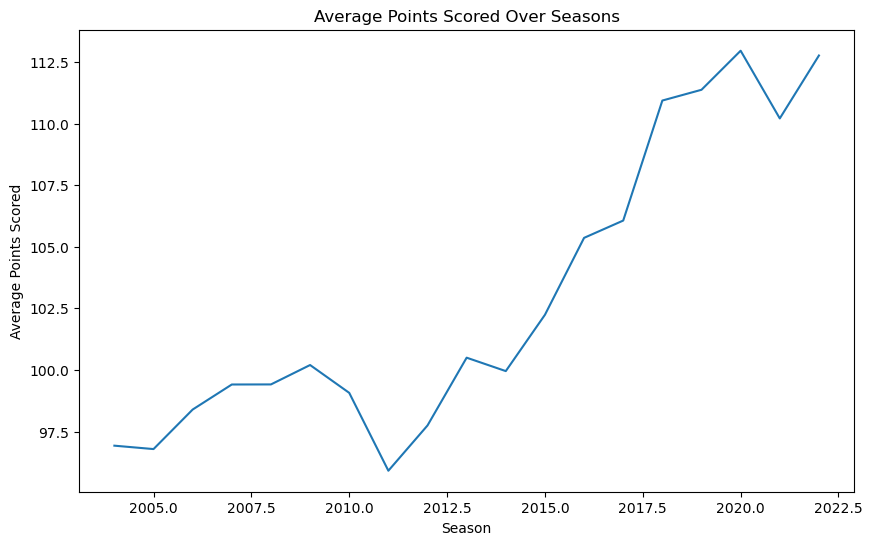

In [11]:
# Time series plot for points scored over seasons
team_data.groupby('SEASON')['PTS'].mean().plot(kind='line', figsize=(10, 6))
plt.xlabel('Season')
plt.ylabel('Average Points Scored')
plt.title('Average Points Scored Over Seasons')
plt.show()


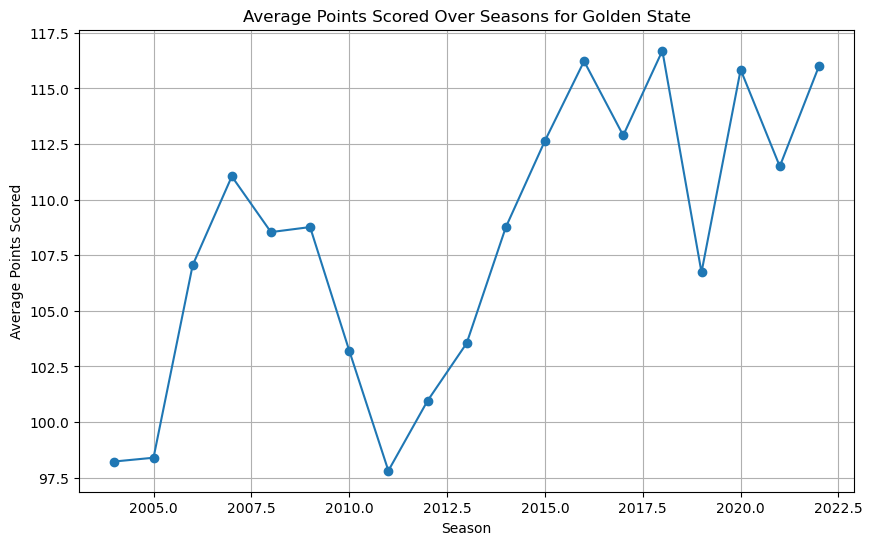

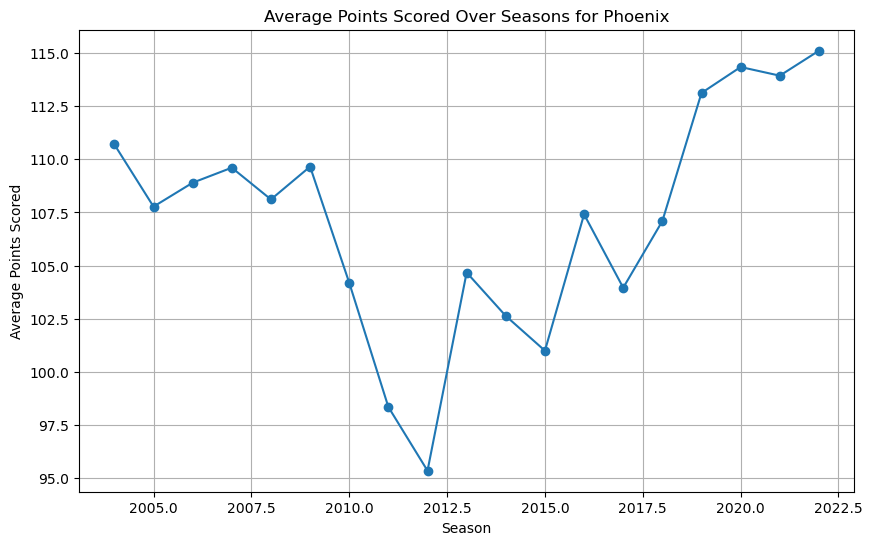

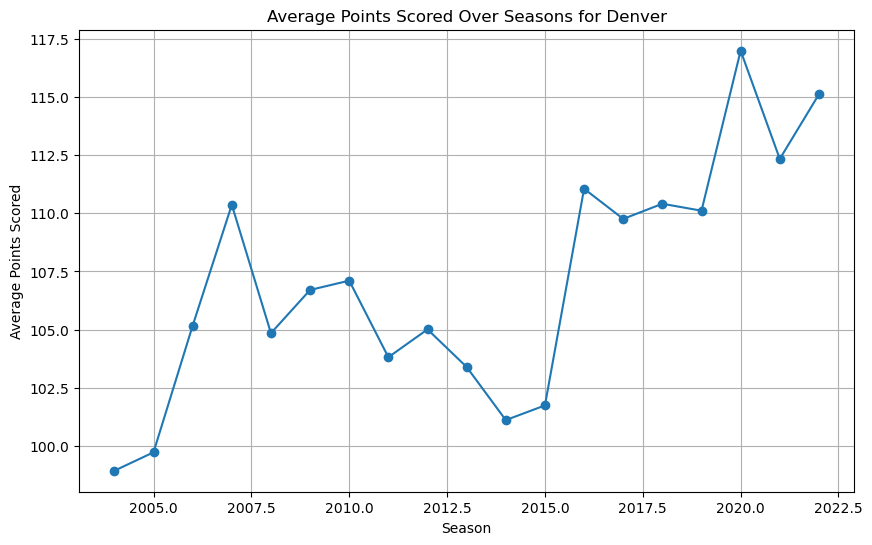

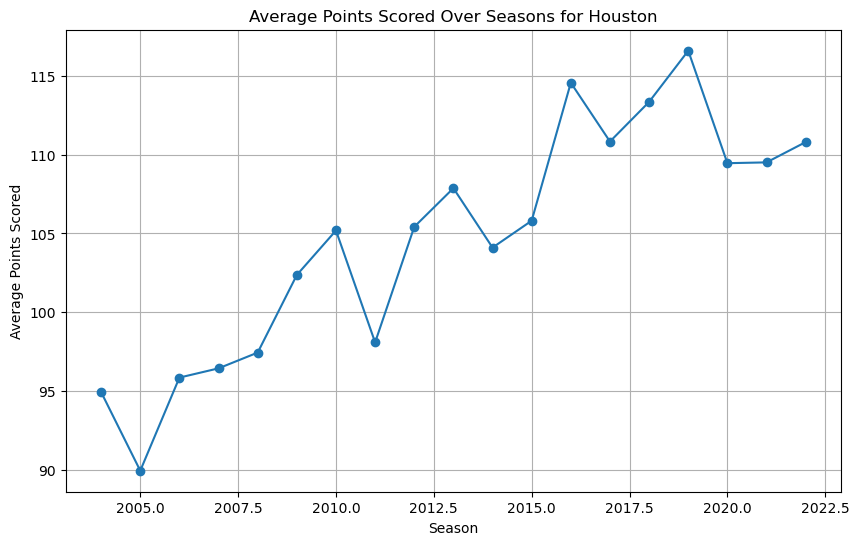

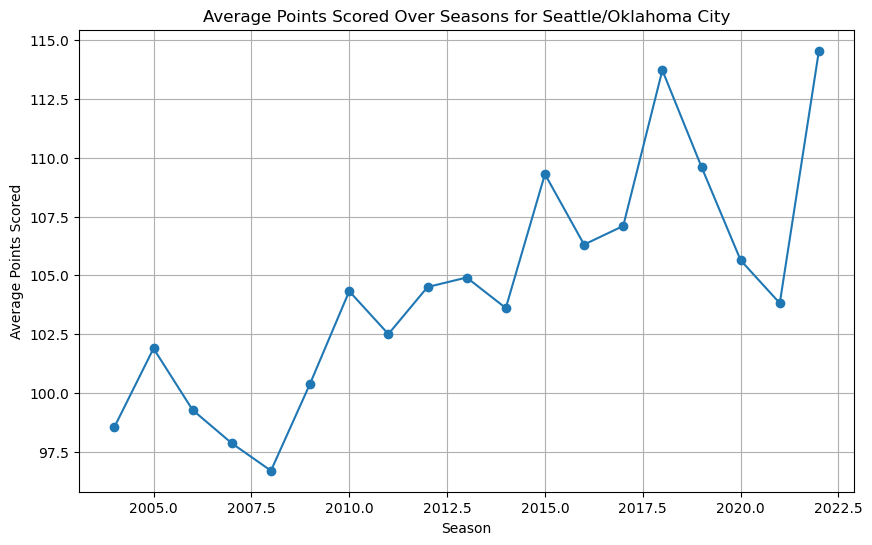

{'Golden State':     SEASON         PTS
 0     2004   98.223529
 1     2005   98.393258
 2     2006  107.050505
 3     2007  111.045977
 4     2008  108.540230
 5     2009  108.766667
 6     2010  103.211111
 7     2011   97.808824
 8     2012  100.950495
 9     2013  103.541667
 10    2014  108.756757
 11    2015  112.646018
 12    2016  116.226415
 13    2017  112.887850
 14    2018  116.697248
 15    2019  106.728571
 16    2020  115.844156
 17    2021  111.495413
 18    2022  116.000000,
 'Phoenix':     SEASON         PTS
 0     2004  110.700000
 1     2005  107.772727
 2     2006  108.898990
 3     2007  109.606383
 4     2008  108.111111
 5     2009  109.657143
 6     2010  104.188889
 7     2011   98.338235
 8     2012   95.337079
 9     2013  104.670455
 10    2014  102.625000
 11    2015  100.988636
 12    2016  107.409091
 13    2017  103.953488
 14    2018  107.093023
 15    2019  113.125000
 16    2020  114.346939
 17    2021  113.939394
 18    2022  115.114286,
 'Denver': 

In [12]:

# Calculate the average points scored for each team
avg_pts_by_team = team_data.groupby('TEAM_CITY')['PTS'].mean().reset_index()

# Identify the top 5 teams with the highest average points scored
top_teams = avg_pts_by_team.sort_values(by='PTS', ascending=False).head(5)

# Get the list of top 5 team names
top_team_names = top_teams['TEAM_CITY'].tolist()

# Prepare a dictionary to store the numerical results
numerical_results = {}

# Plotting the time series for each of the top 5 teams
for team in top_team_names:
    team_data_filtered = team_data[team_data['TEAM_CITY'] == team]
    avg_pts_per_season = team_data_filtered.groupby('SEASON')['PTS'].mean().reset_index()
    
    # Store the numerical results
    numerical_results[team] = avg_pts_per_season
    
    # Plot the time series for the current team
    plt.figure(figsize=(10, 6))
    plt.plot(avg_pts_per_season['SEASON'], avg_pts_per_season['PTS'], marker='o', linestyle='-')
    plt.xlabel('Season')
    plt.ylabel('Average Points Scored')
    plt.title(f'Average Points Scored Over Seasons for {team}')
    plt.grid(True)
    plt.show()

# Display numerical results for each team
numerical_results


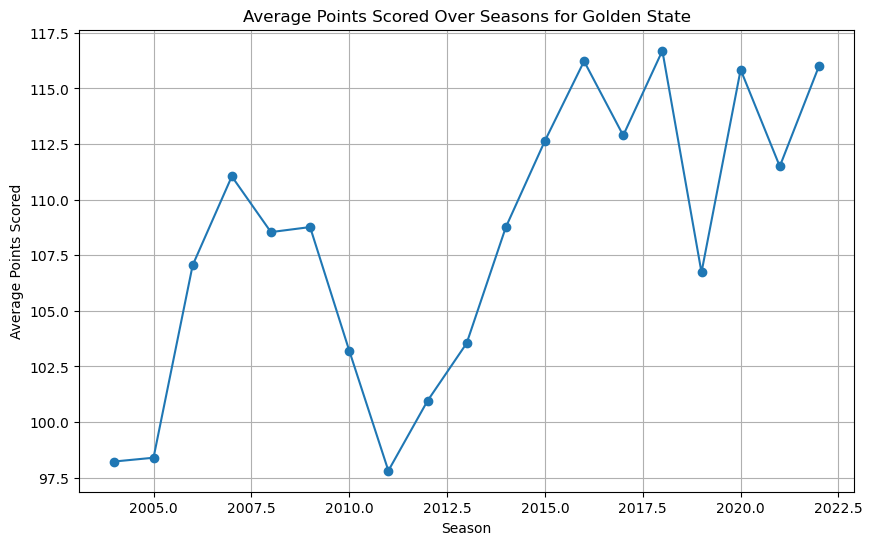

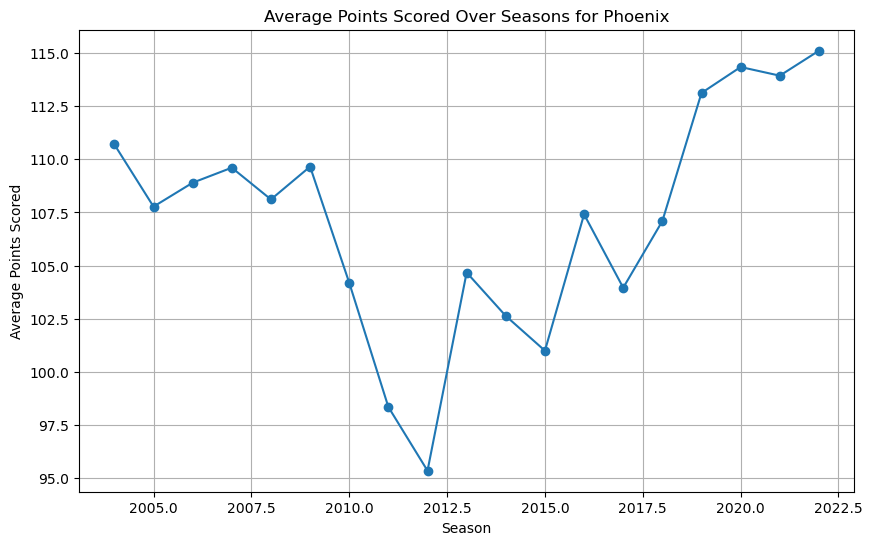

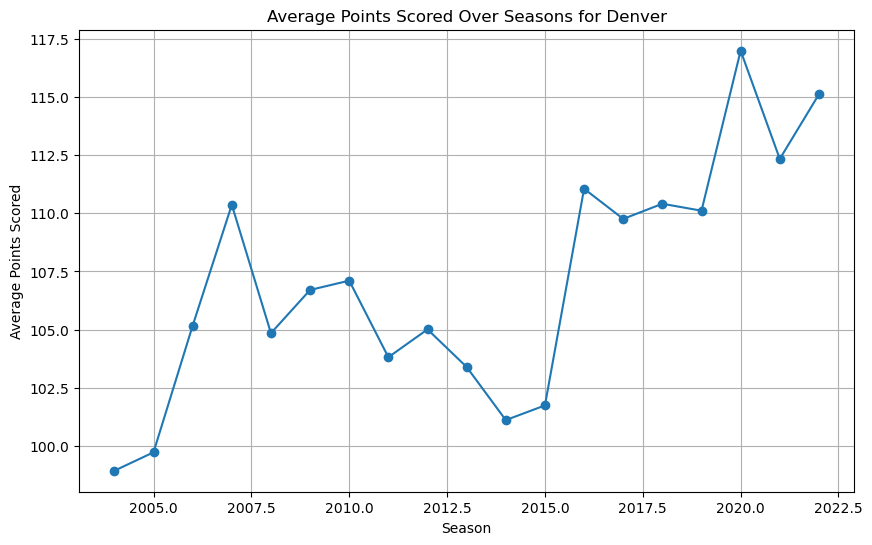

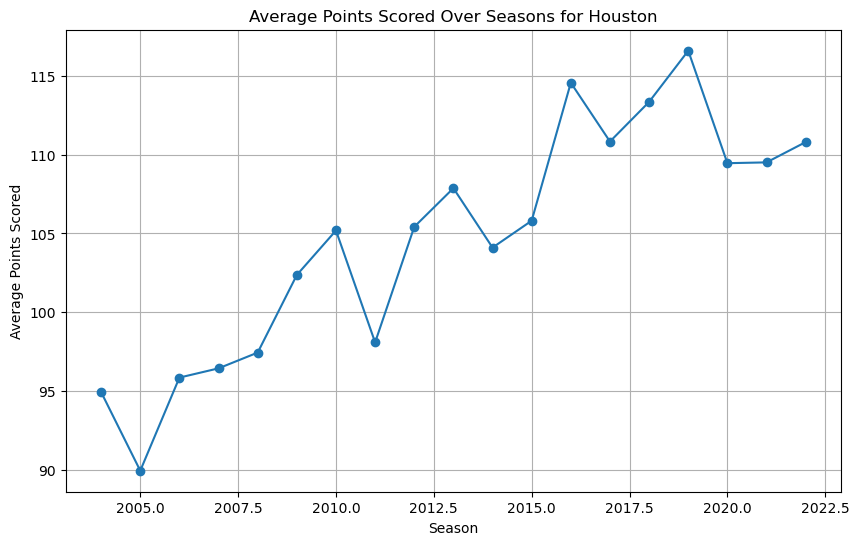

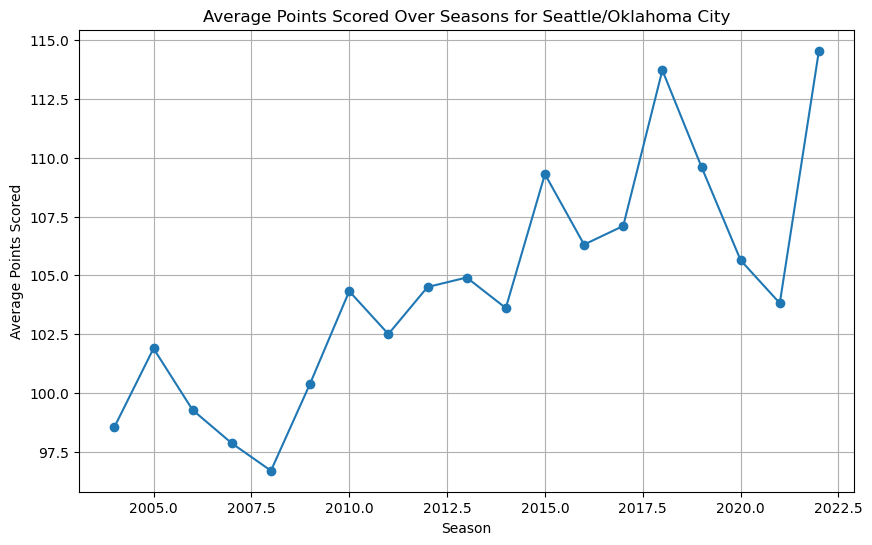

ModuleNotFoundError: No module named 'ace_tools'

In [13]:
# Calculate the average points scored for each team
avg_pts_by_team = team_data.groupby('TEAM_CITY')['PTS'].mean().reset_index()

# Identify the top 5 teams with the highest average points scored
top_teams = avg_pts_by_team.sort_values(by='PTS', ascending=False).head(5)

# Get the list of top 5 team names
top_team_names = top_teams['TEAM_CITY'].tolist()

# Prepare a dictionary to store the numerical results
numerical_results = {}

# Plotting the time series for each of the top 5 teams
for team in top_team_names:
    team_data_filtered = team_data[team_data['TEAM_CITY'] == team]
    avg_pts_per_season = team_data_filtered.groupby('SEASON')['PTS'].mean().reset_index()
    
    # Store the numerical results
    numerical_results[team] = avg_pts_per_season
    
    # Plot the time series for the current team
    plt.figure(figsize=(10, 6))
    plt.plot(avg_pts_per_season['SEASON'], avg_pts_per_season['PTS'], marker='o', linestyle='-')
    plt.xlabel('Season')
    plt.ylabel('Average Points Scored')
    plt.title(f'Average Points Scored Over Seasons for {team}')
    plt.grid(True)
    plt.show()

# Convert numerical results to dataframes and display
numerical_results_dfs = {team: data for team, data in numerical_results.items()}

import ace_tools as tools; tools.display_dataframe_to_user(name="Numerical Results for Top Teams", dataframe=pd.concat(numerical_results_dfs))

numerical_results_dfs


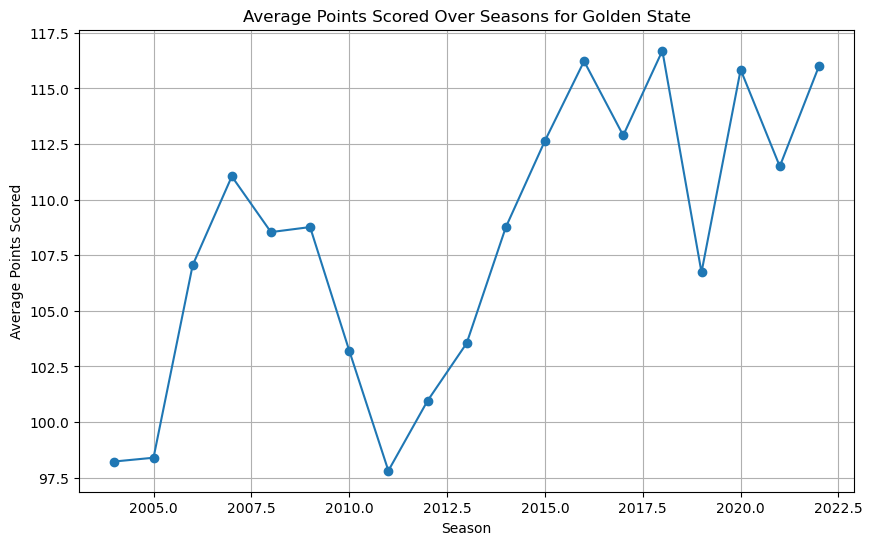

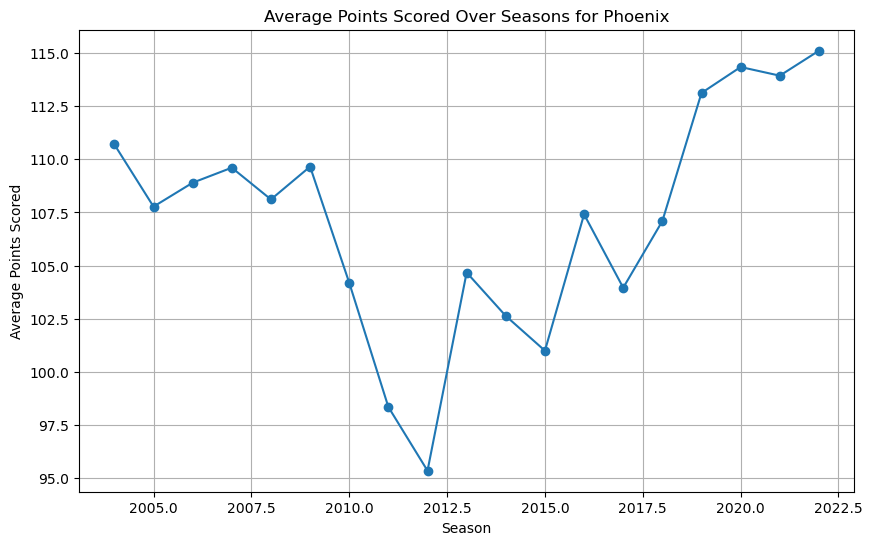

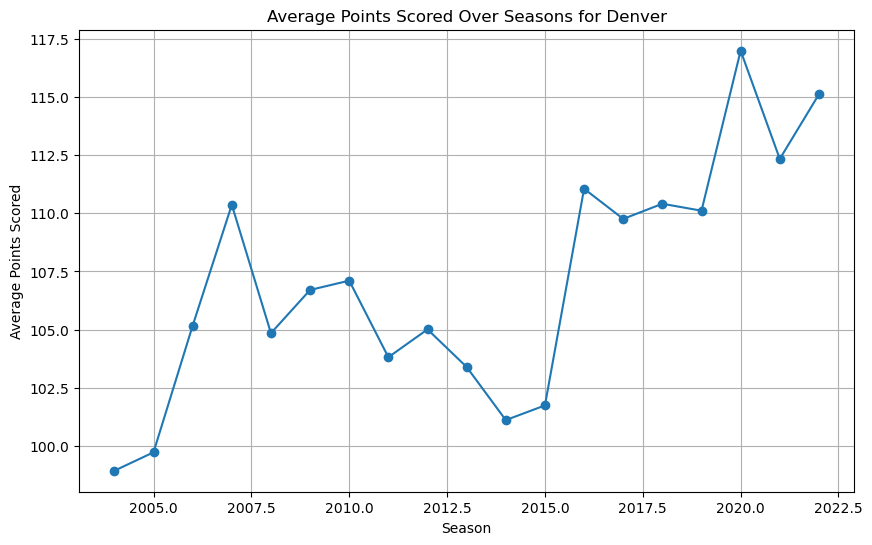

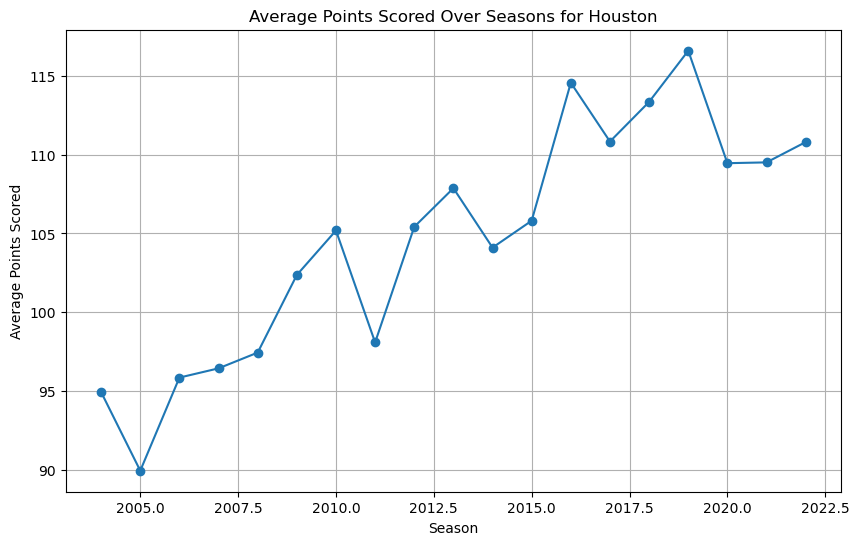

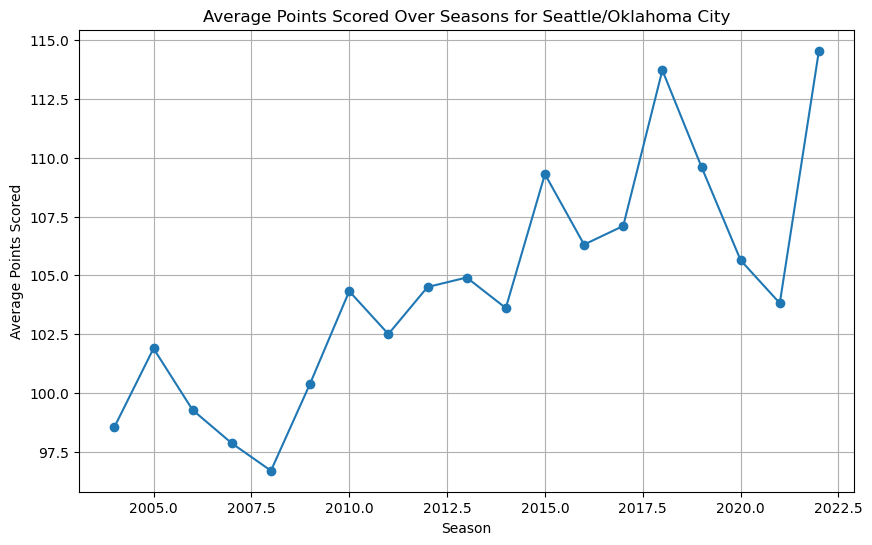

Average Points Scored per Season for Golden State
    SEASON         PTS
0     2004   98.223529
1     2005   98.393258
2     2006  107.050505
3     2007  111.045977
4     2008  108.540230
5     2009  108.766667
6     2010  103.211111
7     2011   97.808824
8     2012  100.950495
9     2013  103.541667
10    2014  108.756757
11    2015  112.646018
12    2016  116.226415
13    2017  112.887850
14    2018  116.697248
15    2019  106.728571
16    2020  115.844156
17    2021  111.495413
18    2022  116.000000


Average Points Scored per Season for Phoenix
    SEASON         PTS
0     2004  110.700000
1     2005  107.772727
2     2006  108.898990
3     2007  109.606383
4     2008  108.111111
5     2009  109.657143
6     2010  104.188889
7     2011   98.338235
8     2012   95.337079
9     2013  104.670455
10    2014  102.625000
11    2015  100.988636
12    2016  107.409091
13    2017  103.953488
14    2018  107.093023
15    2019  113.125000
16    2020  114.346939
17    2021  113.939394
18    

In [14]:
# Calculate the average points scored for each team
avg_pts_by_team = team_data.groupby('TEAM_CITY')['PTS'].mean().reset_index()

# Identify the top 5 teams with the highest average points scored
top_teams = avg_pts_by_team.sort_values(by='PTS', ascending=False).head(5)

# Get the list of top 5 team names
top_team_names = top_teams['TEAM_CITY'].tolist()

# Prepare a dictionary to store the numerical results
numerical_results = {}

# Plotting the time series for each of the top 5 teams
for team in top_team_names:
    team_data_filtered = team_data[team_data['TEAM_CITY'] == team]
    avg_pts_per_season = team_data_filtered.groupby('SEASON')['PTS'].mean().reset_index()
    
    # Store the numerical results
    numerical_results[team] = avg_pts_per_season
    
    # Plot the time series for the current team
    plt.figure(figsize=(10, 6))
    plt.plot(avg_pts_per_season['SEASON'], avg_pts_per_season['PTS'], marker='o', linestyle='-')
    plt.xlabel('Season')
    plt.ylabel('Average Points Scored')
    plt.title(f'Average Points Scored Over Seasons for {team}')
    plt.grid(True)
    plt.show()

# Convert numerical results to dataframes and display
for team, data in numerical_results.items():
    print(f'Average Points Scored per Season for {team}')
    print(data)
    print('\n')


In [17]:
nba_player_data= pd.read_excel("/Users/daphne/Documents/ NBA Data Sets/NBA_player_data_new.xlsx")

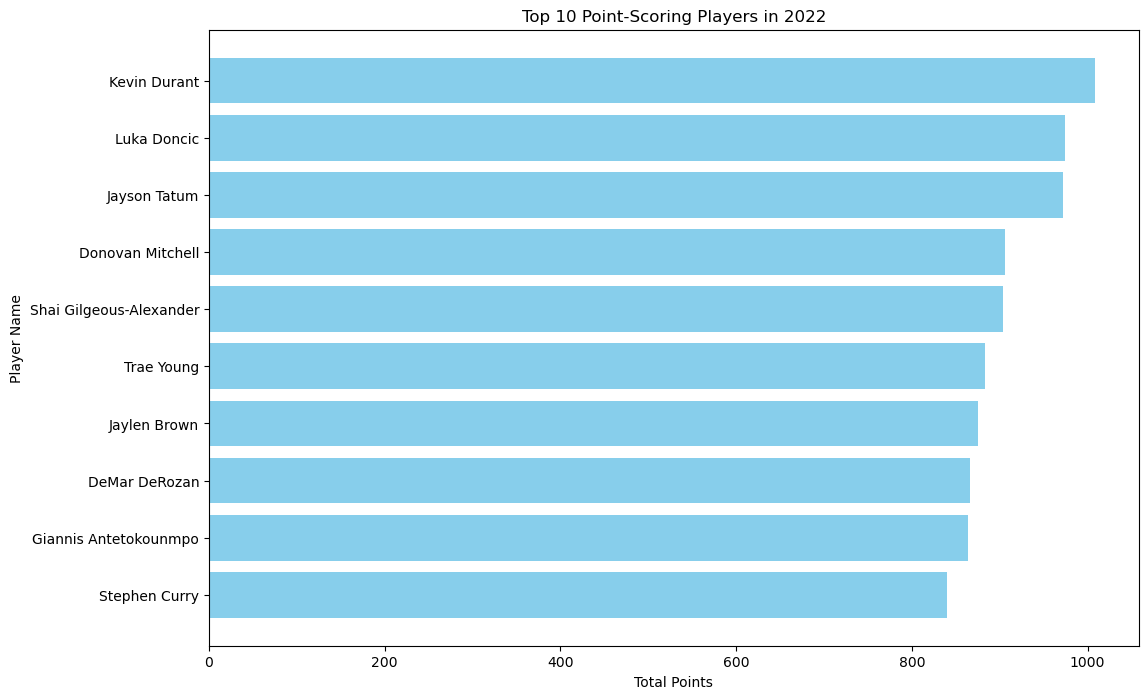

In [25]:


# Filter for the 2022 season
nba_player_data_2022 = nba_player_data[nba_player_data['SEASON'] == 2022]

# Calculate total points by player
top_players_2022 = nba_player_data_2022.groupby(['PLAYER_ID', 'PLAYER_NAME'])['PTS'].sum().reset_index()

# Sort players by total points and get the top 10
top_10_players = top_players_2022.sort_values(by='PTS', ascending=False).head(10)

# Visualize the top 10 point-scoring players
plt.figure(figsize=(12, 8))
plt.barh(top_10_players['PLAYER_NAME'], top_10_players['PTS'], color='skyblue')
plt.xlabel('Total Points')
plt.ylabel('Player Name')
plt.title('Top 10 Point-Scoring Players in 2022')
plt.gca().invert_yaxis()  # Highest scorer on top
plt.show()


/var/folders/m7/gn8st0h13wg_skfb6q5h9zkr0000gn/T/ipykernel_2226/164542163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_player_data_2022['DEF_STATS'] = nba_player_data_2022['STL'] + nba_player_data_2022['BLK']


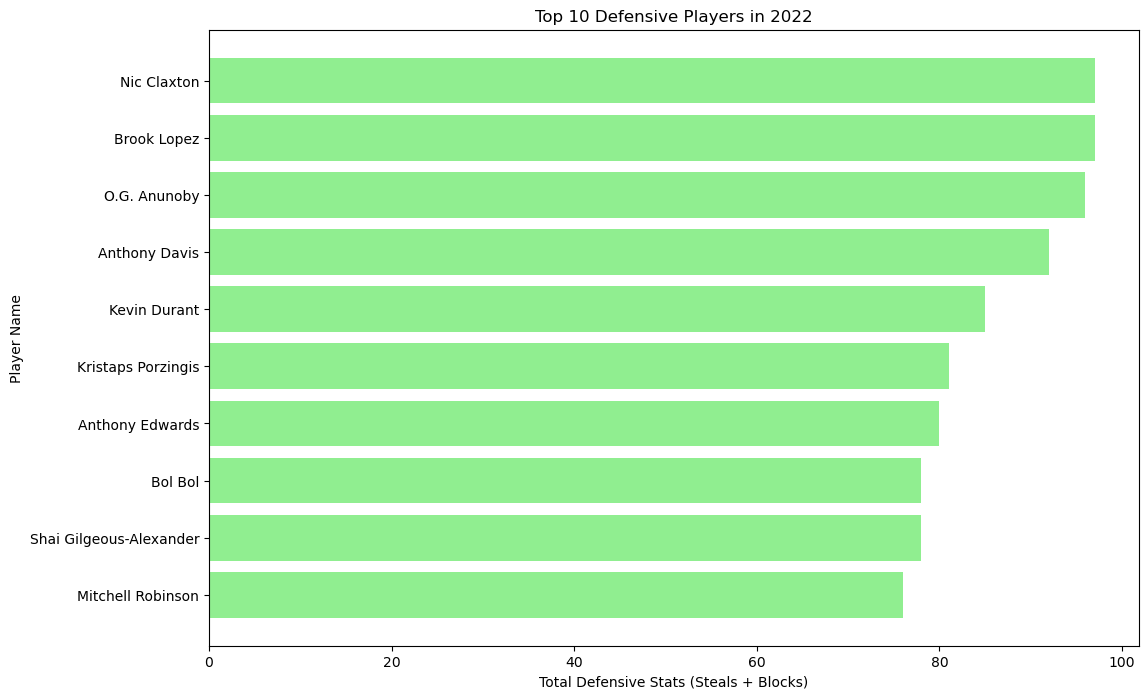

In [27]:

# Filter for the 2022 season
nba_player_data_2022 = nba_player_data[nba_player_data['SEASON'] == 2022]

# Calculate total defensive stats (steals + blocks) by player
nba_player_data_2022['DEF_STATS'] = nba_player_data_2022['STL'] + nba_player_data_2022['BLK']

# Group by player and sum the defensive stats
top_defensive_players_2022 = nba_player_data_2022.groupby(['PLAYER_ID', 'PLAYER_NAME'])['DEF_STATS'].sum().reset_index()

# Sort players by total defensive stats and get the top 10
top_10_defensive_players = top_defensive_players_2022.sort_values(by='DEF_STATS', ascending=False).head(10)

# Visualize the top 10 defensive players
plt.figure(figsize=(12, 8))
plt.barh(top_10_defensive_players['PLAYER_NAME'], top_10_defensive_players['DEF_STATS'], color='lightgreen')
plt.xlabel('Total Defensive Stats (Steals + Blocks)')
plt.ylabel('Player Name')
plt.title('Top 10 Defensive Players in 2022')
plt.gca().invert_yaxis()  # Highest scorer on top
plt.show()


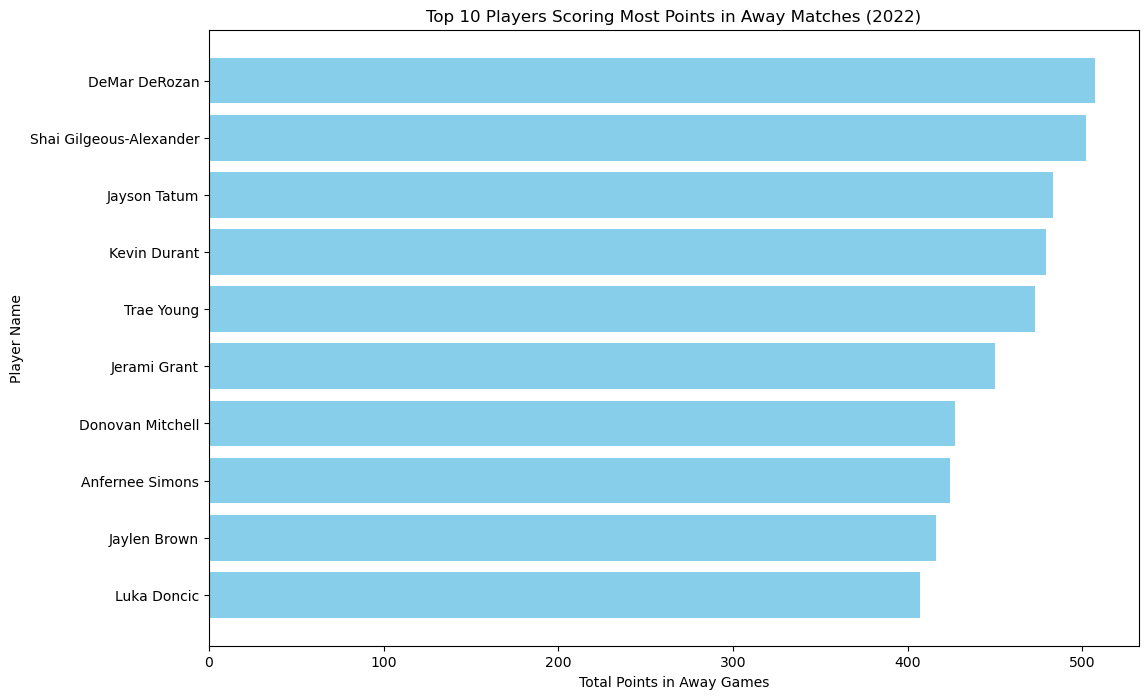

In [37]:

# Filter for the 2022 season and away games (IS_HOME = 0)
nba_away_games_2022 = nba_player_data[(nba_player_data['SEASON'] == 2022) & (nba_player_data['IS_HOME'] == 0)]

# Calculate total points by player in away games
top_away_scorers = nba_away_games_2022.groupby(['PLAYER_ID', 'PLAYER_NAME'])['PTS'].sum().reset_index()

# Sort players by total points and get the top 10
top_10_away_scorers = top_away_scorers.sort_values(by='PTS', ascending=False).head(10)

# Visualize the top 10 point-scoring players in away games
plt.figure(figsize=(12, 8))
plt.barh(top_10_away_scorers['PLAYER_NAME'], top_10_away_scorers['PTS'], color='skyblue')
plt.xlabel('Total Points in Away Games')
plt.ylabel('Player Name')
plt.title('Top 10 Players Scoring Most Points in Away Matches (2022)')
plt.gca().invert_yaxis()  # Highest scorer on top
plt.show()
